In [76]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [77]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [78]:
# result_loc = "./../../../../Server_results/10_04_2021_less_random/"
# run_name = "experiment04_10_11_04_40"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

result_loc = "./../../../../Server_results/10_22_2021/"
run_name = "experiment21_10_14_42_5"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [79]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [80]:
q_x.shape

(57, 64, 50)

In [81]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [82]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


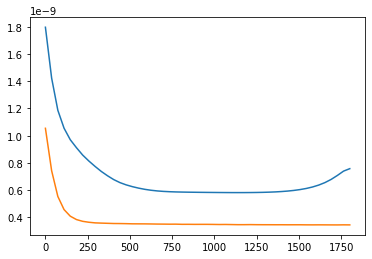

In [83]:
epoch = 1
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


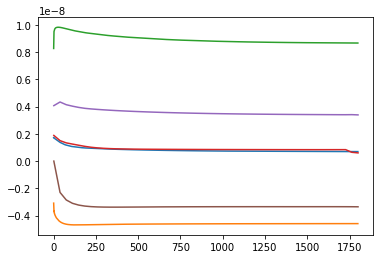

In [84]:
epoch = 51


plt.plot(q_MC_y.mean(axis=0))
plt.plot(q_MC_y.min(axis=0))
plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

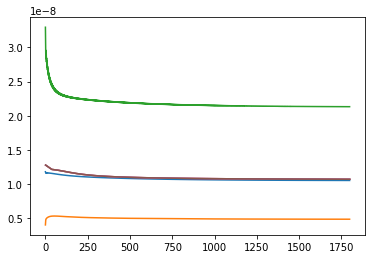

In [85]:
epoch = 2
plt.plot(q_MC_x.mean(axis=0))
plt.plot(q_MC_x.min(axis=0))
plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [86]:
p[61,:]

IndexError: index 61 is out of bounds for axis 0 with size 57

In [87]:
k_y[37,:,40] - k_y[35,:,40]

array([ 9.55281022e-22,  6.74971569e-06, -4.97398634e-07, -1.04881593e-06,
       -2.24425678e-21,  6.75008428e-06, -4.53032732e-07, -1.08163380e-06,
       -4.06056056e-22,  6.74990916e-06, -4.97402561e-07, -1.04933226e-06,
       -3.34724115e-22,  6.75119860e-06, -4.53004429e-07, -1.07717329e-06,
        3.75385093e-10,  2.95379622e-11, -1.34143744e-10, -1.74857875e-11,
       -1.61967450e-10, -1.36132325e-10,  2.15321860e-10, -3.10559743e-10,
        4.22222485e-11,  8.10389688e-11,  2.86188613e-10, -1.12460508e-10,
        4.13180699e-10,  2.19050100e-11,  3.04461259e-10, -1.62613325e-10,
       -1.99883820e-10, -2.76378670e-10, -2.36710670e-10,  2.71592096e-10,
        2.65745969e-10,  5.26542763e-11, -1.86452934e-10,  4.04989470e-10,
       -2.08399979e-10, -3.85275380e-10, -1.98590954e-10, -2.31152076e-10,
        3.57308702e-10, -9.66256296e-11,  2.95574365e-10, -1.23253626e-10,
        2.47637654e-10, -2.85362293e-10,  3.93961472e-10,  2.82580947e-11,
        1.58352527e-10, -

In [88]:
k_xy[36,:,40]

array([-1.47005132e-14,  7.12864915e-08,  6.34447889e-08,  6.75576844e-08,
       -1.47000450e-14,  7.12863701e-08,  6.32853991e-08,  6.76571243e-08,
       -1.47006717e-14,  7.12868335e-08,  6.34450656e-08,  6.75610840e-08,
       -1.47004179e-14,  7.12904407e-08,  6.32840857e-08,  6.76445879e-08,
       -1.20932224e-08, -1.21095280e-08, -1.21494507e-08, -1.21337149e-08,
       -1.20862910e-08, -1.21144710e-08, -1.20730661e-08, -1.21279054e-08,
       -1.20975493e-08, -1.21043779e-08, -1.21350158e-08, -1.20835119e-08,
       -1.20929785e-08, -1.21241099e-08, -1.21032927e-08, -1.21060900e-08,
       -1.21114096e-08, -1.21101179e-08, -1.21255431e-08, -1.21234645e-08,
       -1.21069982e-08, -1.21140688e-08, -1.20783038e-08, -1.20913134e-08,
       -1.21434911e-08, -1.21446529e-08, -1.21044705e-08, -1.20885994e-08,
       -1.20853451e-08, -1.21159748e-08, -1.21047917e-08, -1.21003508e-08,
       -1.21155691e-08, -1.21146110e-08, -1.21204092e-08, -1.20911188e-08,
       -1.21066942e-08, -

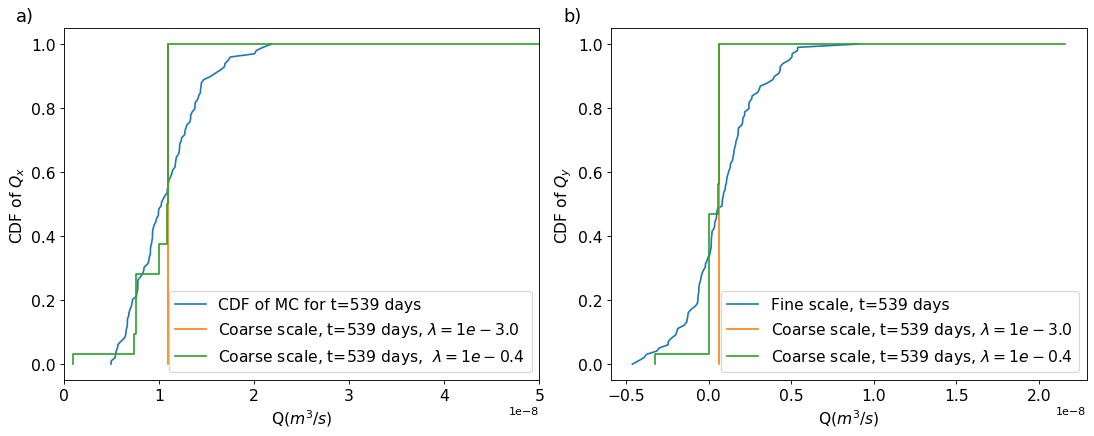

In [104]:
epoch_1 = 1
epoch_2 = 55

time_step = 15


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [53]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [17]:
# b_perc =df_perc


In [32]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.1,0.5,0.9]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [97]:
epoch = 55
t = np.linspace(0,1800,N_steps)

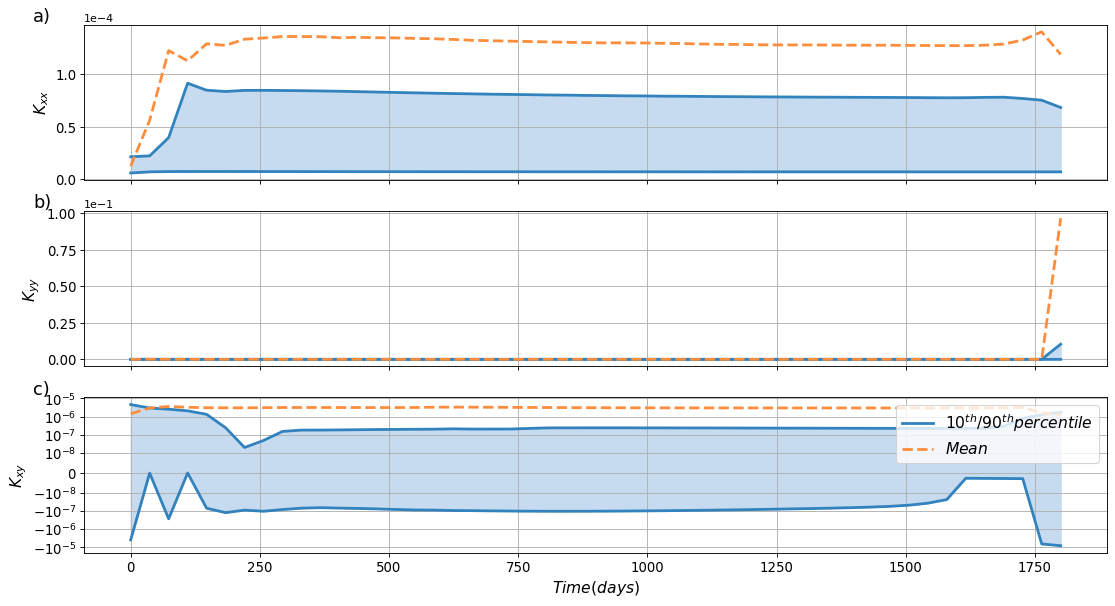

In [98]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)
